<a href="https://colab.research.google.com/github/lmu-cmsi1010-fall2021/lab-notebook-originals/blob/main/17_Introduction_to_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Reference: This notebook was borrowed from Dr. Freitas (originally Berkeley's Data 8 course)!

Today you’ll see how to work with datasets in Python -- **collections** of data like text or numbers.  In this class, we principally use two kinds of collections:
 * **Arrays:** An array is a collection of many pieces of a single kind of data, kept in order.  An array is like a single column in an Excel spreadsheet.
 * **Tables:** A table is a collection of many pieces of different kinds of data.  Each kind of data is in its own **column** and generally the data in the table relating to one entity makes up a **row**.  A table is like an entire Excel spreadsheet.
 
Tables are a fundamental way of representing data sets. A table can be viewed in two ways:

- a sequence of named columns that each describe a single attribute of all entries in a data set, or
- a sequence of rows that each contain all information about a single individual in a data set.


Examples from [*Inferential Thinking*](https://www.inferentialthinking.com/chapters/03/4/Introduction_to_Tables) and [Data8.org](http://data8.org/)

## Lists, Arrays, and Tables

While Python has the built-in list type, an array is a type that can be imported from the `datascience` or `numpy` libraries. **Arrays** are like lists, except **all the elements are of the same type** and they are designed for higher performance and more efficient calculations on the data they contain.

Lists can be useful when working with tables because they can describe the contents of one row in a table, which often  corresponds to a sequence of values with different types. A list of lists can be used to describe multiple rows.

Each column in a table is a collection of values with the same type (an array). If you create a table column from a list, it will automatically be converted to an array. A row, on the ther hand, mixes types.

In [ ]:
make_array(8, 34, 5)

array([ 8, 34,  5])

In [ ]:
make_array('lotus', 'sunflower', 'rose')

array(['lotus', 'sunflower', 'rose'], dtype='<U9')

In [ ]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [ ]:
my_flower = [0, 'podweed']
my_flower

[0, 'podweed']

In [ ]:
four_flowers = flowers.with_row(my_flower)
four_flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose
0,podweed


In [ ]:
other_flowers = [[10, 'lavender'], [3, 'birds of paradise'], [6, 'tulip']]

seven_flowers = four_flowers.with_rows(other_flowers)
seven_flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose
0,podweed
10,lavender
3,birds of paradise
6,tulip


## NBA Table

We can also create a table by reading from a csv file.

In [ ]:
source = 'https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/nba_salaries.csv'

nba = Table.read_table(source)
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [ ]:
nba.where('TEAM', 'Los Angeles Lakers')

PLAYER,POSITION,TEAM,'15-'16 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Roy Hibbert,C,Los Angeles Lakers,15.5922
Louis Williams,SG,Los Angeles Lakers,7
Nick Young,SF,Los Angeles Lakers,5.21917
D'Angelo Russell,PG,Los Angeles Lakers,5.10312
Julius Randle,PF,Los Angeles Lakers,3.13224
Brandon Bass,PF,Los Angeles Lakers,3
Ryan Kelly,PF,Los Angeles Lakers,1.72425
Larry Nance Jr.,PF,Los Angeles Lakers,1.1556
Robert Sacre,C,Los Angeles Lakers,0.981348


In [ ]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,'15-'16 SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


In [ ]:
nba.where('POSITION', 'PG').sort("'15-'16 SALARY", descending=True).show(15)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Chris Paul,PG,Los Angeles Clippers,21.4687
Derrick Rose,PG,Chicago Bulls,20.0931
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
John Wall,PG,Washington Wizards,15.852
Goran Dragic,PG,Miami Heat,14.783
Reggie Jackson,PG,Detroit Pistons,13.913
Eric Bledsoe,PG,Phoenix Suns,13.5
Tony Parker,PG,San Antonio Spurs,13.4375
Ricky Rubio,PG,Minnesota Timberwolves,12.7


We can use `.column()` to extract a specific column, followed by `.item()` to extract a specific row in our table. For example, let's say we want to see which NBA player had the highest salary in 2015-2016. First, we sort by salary, then we take the player column, lastly we take the top row.

In [ ]:
nba.sort("'15-'16 SALARY", descending=True).column('PLAYER').item(0)

'Kobe Bryant'

## Reading books

You can also load an entire book from the online Project Gutenberg!

In [ ]:
import urllib.request
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = urllib.request.urlopen(little_women_url).read().decode('utf-8')
little_women_chapters = little_women_text.split('CHAPTER ')[1:]
little_women = Table().with_column('Chapters', little_women_chapters)
little_women

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to t ..."
"FIVE BEING NEIGHBORLY ""What in the world are you g ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a p ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you goin ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was th ..."
"TEN THE P.C. AND P.O. As spring came on, a new set ..."


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


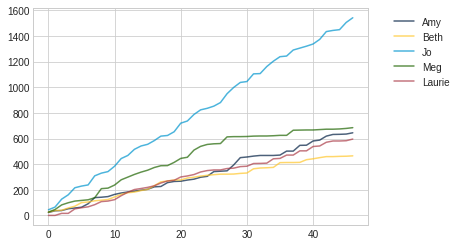

In [ ]:
# Counts of character names in the chapters of Little Women.
counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    ])

# Plot the cumulative counts (x-axis is the chapter, y-axis is the count).
counts.cumsum().plot(overlay=True)

# Laurie is a young man who marries one of the women in the end. 
# TODO: See if you can use the plots to guess which one!
# TODO: Who is the main character?

## Lab time, Part 1: Table operations

The table `farmers_markets.csv` contains data on farmers' markets in the United States  (data collected [by the USDA](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)).  Each row represents one such market.

Run the next cell to load the `farmers_markets` table.

In [ ]:
source = 'https://raw.githubusercontent.com/data-8/materials-fa19/master/materials/fa19/lab/lab02/farmers_markets.csv'
farmers_markets = Table.read_table(source)

Let's examine our table to see what data it contains.

**Question 1.** Use the method `show` to display the first 5 rows of `farmers_markets`. 

**Hint:** `tbl.show(3)` will show the first 3 rows of a Table named `tbl`. Additionally, make sure not to call `.show()` without an argument, as this might crash your kernel!

In [ ]:
...

Notice that some of the values in this table are missing, as denoted by "nan." This means either that the value is not available (e.g. if we don’t know the market’s street address) or not applicable (e.g. if the market doesn’t have a street address). You'll also notice that the table has a large number of columns in it!

### `num_columns`

The table property `num_columns` returns the number of columns in a table. (A "property" is just a method that doesn't need to be called by adding parentheses.)

Example call: `<tbl>.num_columns`

**Question 2.** Use `num_columns` to find the number of columns in our farmers' markets dataset.

Assign the number of columns to `num_farmers_markets_columns`.

In [ ]:
num_farmers_markets_columns = ...
print('The table has', num_farmers_markets_columns, 'columns in it!')

### `num_rows`

Similarly, the property `num_rows` tells you how many rows are in a table.

In [ ]:
num_farmers_markets_rows = ...
print('The table has', num_farmers_markets_rows, 'rows in it!')

### `select`

Most of the columns are about particular products -- whether the market sells tofu, pet food, etc.  If we're not interested in that information, it just makes the table difficult to read.  This comes up more than you might think, because people who collect and publish data may not know ahead of time what people will want to do with it.

In such situations, we can use the table method `select` to choose only the columns that we want in a particular table. It takes any number of arguments. Each should be the name of a column in the table. It returns a new table with only those columns in it. The columns are in the order *in which they were listed as arguments*.

For example, the value of `farmers_markets.select('MarketName', 'State')` is a table with only the name and the state of each farmers' market in `farmers_markets`.



**Question 3.** Use `select` to create a table with only the name, city, state, latitude (`y`), and longitude (`x`) of each market.  Call that new table `farmers_markets_locations`.

*Hint:* Make sure to be exact when using column names with `select`; double-check capitalization!

In [ ]:
farmers_markets_locations = ...
farmers_markets_locations

### `drop`

`drop` serves the same purpose as `select`, but it takes away the columns that you provide rather than the ones that you don't provide. Like `select`, `drop` returns a new table.

**Question 4.** Suppose you just didn't want the `FMID` or `updateTime` columns in `farmers_markets`.  Create a table that's a copy of `farmers_markets` but doesn't include those columns.  Call that table `farmers_markets_without_fmid`.

In [ ]:
farmers_markets_without_fmid = ...
farmers_markets_without_fmid

Now, suppose we want to answer some questions about farmers' markets in the US. For example, which market(s) have the largest longitude (given by the `x` column)? 

To answer this, we'll sort `farmers_markets_locations` by longitude.

In [ ]:
farmers_markets_locations.sort('x')

Oops, that didn't answer our question because we sorted from smallest to largest longitude. To look at the largest longitudes, we'll have to sort in reverse order.

In [ ]:
farmers_markets_locations.sort('x', descending=True)

(The `descending=True` bit is called an *optional argument*. It has a default value of `False`, so when you explicitly tell the function `descending=True`, then the function will sort in descending order.)

### `sort`

Some details about sort:

1. The first argument to `sort` is the name of a column to sort by.
2. If the column has text in it, `sort` will sort alphabetically; if the column has numbers, it will sort numerically.
3. The value of `farmers_markets_locations.sort('x')` is a *copy* of `farmers_markets_locations`; the `farmers_markets_locations` table doesn't get modified. For example, if we called `farmers_markets_locations.sort('x')`, then running `farmers_markets_locations` by itself would still return the unsorted table.
4. Rows always stick together when a table is sorted.  It wouldn't make sense to sort just one column and leave the other columns alone.  For example, in this case, if we sorted just the `x` column, the farmers' markets would all end up with the wrong longitudes.

**Question 5.** Create a version of `farmers_markets_locations` that's sorted by **latitude (`y`)**, with the largest latitudes first.  Call it `farmers_markets_locations_by_latitude`.

In [ ]:
farmers_markets_locations_by_latitude = ...
farmers_markets_locations_by_latitude

Now let's say we want a table of all farmers' markets in California. Sorting won't help us much here because California  is closer to the middle of the dataset.

Instead, we use the table method `where`.

In [ ]:
california_farmers_markets = farmers_markets_locations.where('State', are.equal_to('California'))
california_farmers_markets

Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`california_farmers_markets`** to a table whose rows are the rows in the **`farmers_markets_locations`** table **`where`** the **`'State'`**s **`are` `equal` `to` `California`**.

### `where`

Now let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some criterion.
2. A predicate that describes the criterion that the column needs to meet.

The predicate in the example above called the function `are.equal_to` with the value we wanted, 'California'.  We'll see other predicates soon.

`where` returns a table that's a copy of the original table, but **with only the rows that meet the given predicate**.

**Question 6.** Use `california_farmers_markets` to create a table called `la_markets` containing farmers' markets in Los Angeles, California.

In [ ]:
la_markets = ...
la_markets

Recognize any of them?

So far we've only been using `where` with the predicate that requires finding the values in a column to be *exactly* equal to a certain value. However, there are many other predicates. Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

## Part 2: Analyzing a dataset

Now that you're familiar with table operations, let’s answer some interesting questions about a dataset!

Run the cell below to load the `imdb` table. It contains information about the 250 highest-rated movies on IMDb.

In [ ]:
imdb = Table.read_table('https://raw.githubusercontent.com/data-8/materials-fa19/master/materials/fa19/lab/lab02/imdb.csv')
imdb

**Question 7.** Using `where` and one of the predicates from the table above, find all movies with a rating higher than 8.5.  Assign this filtered table to the name `really_highly_rated`. It should contain the same columns as `imdb`.

In [ ]:
really_highly_rated = ...
really_highly_rated

Often, we want to perform multiple operations - sorting, filtering, or others - in order to turn a table we have into something more useful. You can do these operations one by one, e.g.

```
first_step = original_tbl.where('col1', are.equal_to(12))
second_step = first_step.sort('col2', descending=True)
```

However, since the value of the expression `original_tbl.where('col1', are.equal_to(12))` is itself a table, you can just call a table method on it:

```
original_tbl.where('col1', are.equal_to(12)).sort('col2', descending=True)
```
You should organize your work in the way that makes the most sense to you, using informative names for any intermediate tables you create. 

**Question 8.** Create a table of movies released between 2010 and 2016 (inclusive) with ratings above 8. The table should only contain the columns `Title` and `Rating`, **in that order**.

Assign the table to the name `above_eight`.

*Hint:* Think about the steps you need to take, and try to put them in an order that make sense. Feel free to create intermediate tables for each step, but please make sure you assign your final table the name `above_eight`!

In [ ]:
above_eight = ...
above_eight

## Summary

For your reference, here's a table of all the functions and methods we saw in this notebook. We'll learn more methods to work with data in the coming weeks!

|Name|Example|Purpose|
|-|-|-|
|`sort`|`tbl.sort('N')`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where('N', are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select('N')`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop('2*N')`|Create a copy of a table without some of the columns|